<a href="https://colab.research.google.com/github/ivng8/MobileGames-ML/blob/main/HighestGrossingEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
mobile_games_df= pd.read_csv('highest_grossing_mobile_games.csv')
mobile_games_df.head()

,Rank,Name,Platform,Year,Publisher,Global_Sales
0,Honor of Kings / Arena of Valor,"$14,667,500,000",Mobile,Tencent Games,"November 26, 2015",MOBA
1,Monster Strike,"$10,000,000,000",Mobile,Mixi,"August 8, 2013",Puzzle / RPG / Strategy
2,Clash of Clans,"$10,000,000,000",Mobile,Supercell (Tencent),"August 2, 2012",Strategy
3,PUBG Mobile,"$9,000,000,000",Mobile,Tencent Games / Krafton / VNG Games,"March 19, 2018",Battle royale
4,Puzzle & Dragons,"$8,578,340,000",Mobile,GungHo Online Entertainment,"February 20, 2012",RPG / Puzzle


In [ ]:
# Rename the columns as specified
mobile_games_df.rename(columns={
    "Rank": "Name",
    "Name": "Global_Sales",
    "Year": "Publisher",
    "Publisher": "Released_Date",
    "Global_Sales": "Genre"
}, inplace = True)

if 'Revenue' in mobile_games_df.columns:
    mobile_games_df.drop(columns=['Revenue'], inplace = True)

# Display the first few rows of the DataFrame to verify the changes
mobile_games_df.head()

,Name,Global_Sales,Platform,Publisher,Released_Date,Genre
0,Honor of Kings / Arena of Valor,"$14,667,500,000",Mobile,Tencent Games,"November 26, 2015",MOBA
1,Monster Strike,"$10,000,000,000",Mobile,Mixi,"August 8, 2013",Puzzle / RPG / Strategy
2,Clash of Clans,"$10,000,000,000",Mobile,Supercell (Tencent),"August 2, 2012",Strategy
3,PUBG Mobile,"$9,000,000,000",Mobile,Tencent Games / Krafton / VNG Games,"March 19, 2018",Battle royale
4,Puzzle & Dragons,"$8,578,340,000",Mobile,GungHo Online Entertainment,"February 20, 2012",RPG / Puzzle


In [ ]:
# Check data types of each column
print(mobile_games_df.dtypes)

Name             object
Global_Sales     object
Platform         object
Publisher        object
Released_Date    object
Genre            object
dtype: object


In [ ]:
# Convert the Global_Sales to integers
# Remove non-numeric characters (dollar sign and commas) and convert to integers
mobile_games_df['Global_Sales'] = mobile_games_df['Global_Sales'].astype(str).str.replace('[\$,]', '', regex=True).astype(int)

# Convert 'Released_Date' to datetime
mobile_games_df['Released_Date'] = pd.to_datetime(mobile_games_df['Released_Date'])

print(mobile_games_df.dtypes)

Name                     object
Global_Sales              int64
Platform                 object
Publisher                object
Released_Date    datetime64[ns]
Genre                    object
dtype: object


In [ ]:
# Check any null values in the dataset
missing_values = mobile_games_df.isnull().sum()
print(missing_values)

Name             0
Global_Sales     0
Platform         0
Publisher        0
Released_Date    0
Genre            0
dtype: int64


In [ ]:
# Group by genre and sum up global_sales
genre_sales = mobile_games_df.groupby('Genre')['Global_Sales'].sum().reset_index()
# Displaying the result as a table
print(genre_sales.to_string(index=False))

                        Genre  Global_Sales
          ARPG / Hack & slash     731000000
                   Action RPG    5232000000
            Augmented reality    8687720000
                Battle royale   16015270000
              Casual / Casino    3008000000
                         DCCG     773840000
                DCCG / Rhythm     524000000
Digital collectible card game     284000000
                     Fighting    1784000000
                    GCS / MMO    3919000000
                       MMORPG   13882755000
                         MOBA   17853500000
                 Online Bingo     443000000
             Physics / Puzzle     332500000
                       Puzzle   14875600000
          Puzzle / Decoration    5512000000
                 Puzzle / RPG     186000000
      Puzzle / RPG / Strategy   10000000000
            Puzzle / Strategy     151000000
                          RPG   13653200000
                 RPG / Puzzle   12278340000
                       Racing   

In [ ]:
# Sort the DataFrame by 'global_sales' column in descending order and get the top 10 rows
top_10_sales = mobile_games_df.nlargest(10, 'Global_Sales')

# Print the top 10 rows
print(top_10_sales)

                              Name  Global_Sales Platform  \
0  Honor of Kings / Arena of Valor   14667500000   Mobile   
1                   Monster Strike   10000000000   Mobile   
2                   Clash of Clans   10000000000   Mobile   
3                      PUBG Mobile    9000000000   Mobile   
4                 Puzzle & Dragons    8578340000   Mobile   
5                       Pokémon Go    7760000000   Mobile   
6                 Candy Crush Saga    7456000000   Mobile   
7                 Fate/Grand Order    6300000000   Mobile   
8         Fantasy Westward Journey    4700000000   Mobile   
9                 Garena Free Fire    4330000000   Mobile   

                                  Publisher      Released_Date  \
0                             Tencent Games  November 26, 2015   
1                                      Mixi     August 8, 2013   
2                       Supercell (Tencent)     August 2, 2012   
3       Tencent Games / Krafton / VNG Games     March 19, 2018  

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'MOBA'),
  Text(1, 0, 'Puzzle / RPG / Strategy'),
  Text(2, 0, 'Strategy'),
  Text(3, 0, 'Battle royale'),
  Text(4, 0, 'RPG / Puzzle'),
  Text(5, 0, 'Augmented reality'),
  Text(6, 0, 'Puzzle'),
  Text(7, 0, 'RPG'),
  Text(8, 0, 'MMORPG')])

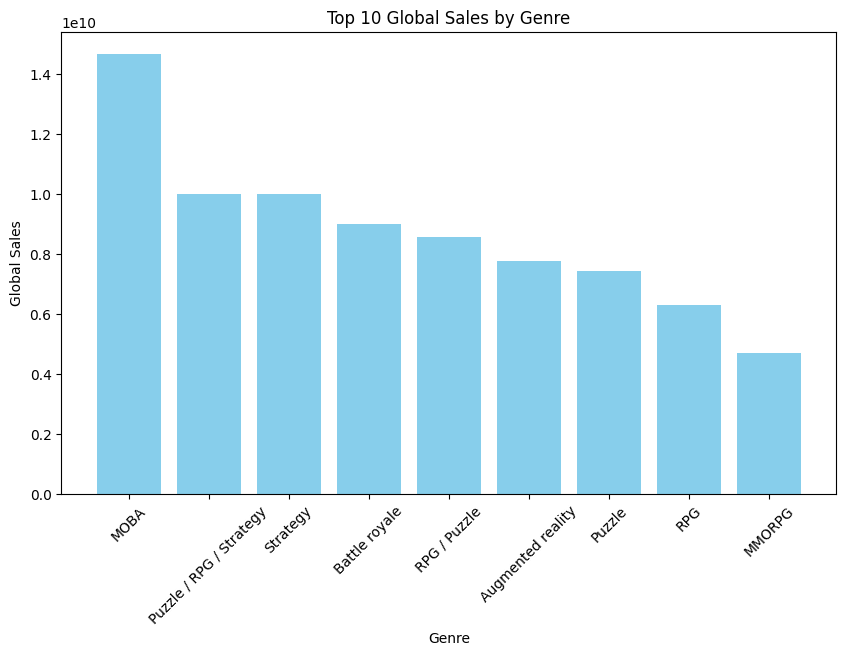

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_sales['Genre'], top_10_sales['Global_Sales'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.title('Top 10 Global Sales by Genre')
plt.xticks(rotation=45)

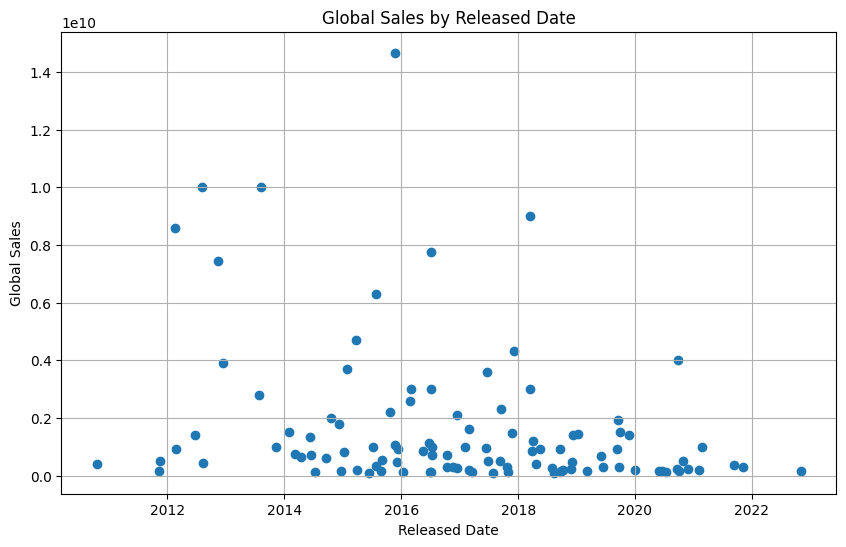

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mobile_games_df['Released_Date'], mobile_games_df['Global_Sales'])
plt.xlabel('Released Date')
plt.ylabel('Global Sales')
plt.title('Global Sales by Released Date')
plt.grid(True)

In [ ]:
# Filter the DataFrame for MOBAs
mobas_df = mobile_games_df[mobile_games_df['Genre'] == 'MOBA']

# Display MOBAs DataFrame
print(mobas_df)

                               Name  Global_Sales Platform  \
0   Honor of Kings / Arena of Valor   14667500000   Mobile   
32                      Brawl Stars    1400000000   Mobile   
39        Mobile Legends: Bang Bang    1000000000   Mobile   
61     League of Legends: Wild Rift     505000000   Mobile   
76                         #COMPASS     281000000   Mobile   

               Publisher Released_Date Genre  
0          Tencent Games    2015-11-26  MOBA  
32   Supercell (Tencent)    2018-12-12  MOBA  
39   Moonton (ByteDance)    2016-07-11  MOBA  
61  Riot Games (Tencent)    2020-10-27  MOBA  
76  NHN PlayArt / Dwango    2016-12-17  MOBA  


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Honor of Kings / Arena of Valor'),
  Text(1, 0, 'Brawl Stars'),
  Text(2, 0, 'Mobile Legends: Bang Bang'),
  Text(3, 0, 'League of Legends: Wild Rift'),
  Text(4, 0, '#COMPASS')])

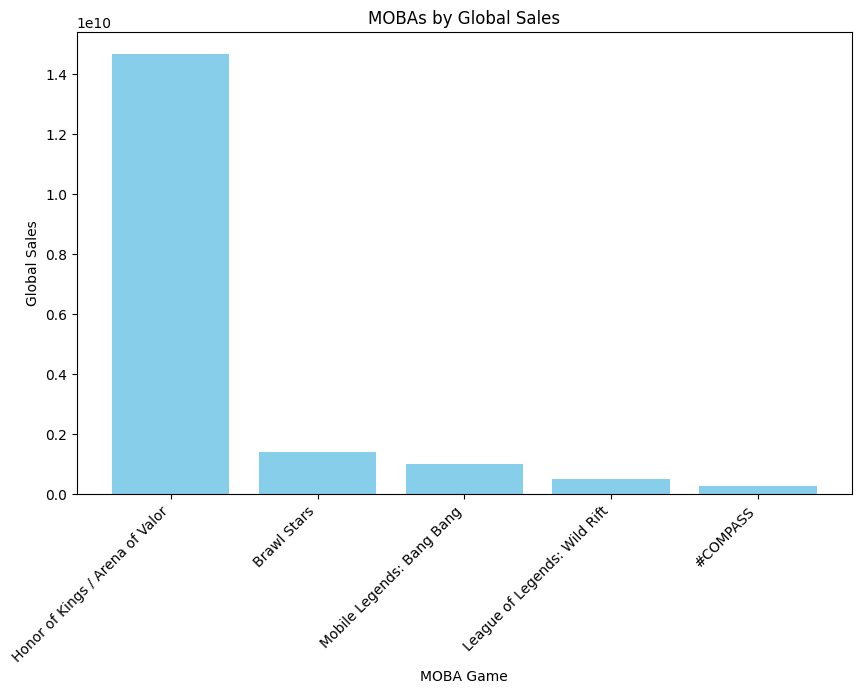

In [ ]:
#Bar chart of the MOBAs
plt.figure(figsize=(10, 6))
plt.bar(mobas_df['Name'], mobas_df['Global_Sales'], color='skyblue')
plt.xlabel('MOBA Game')
plt.ylabel('Global Sales')
plt.title('MOBAs by Global Sales')
plt.xticks(rotation=45, ha='right')